#### Analysis I:

What occurs when all trades are random in a population?

This is going to be a graph showing investment and debt
- multiple samples
- as population increases what happens
- show one sample, then show distribution of samples

Text(0.5, 1.0, '')

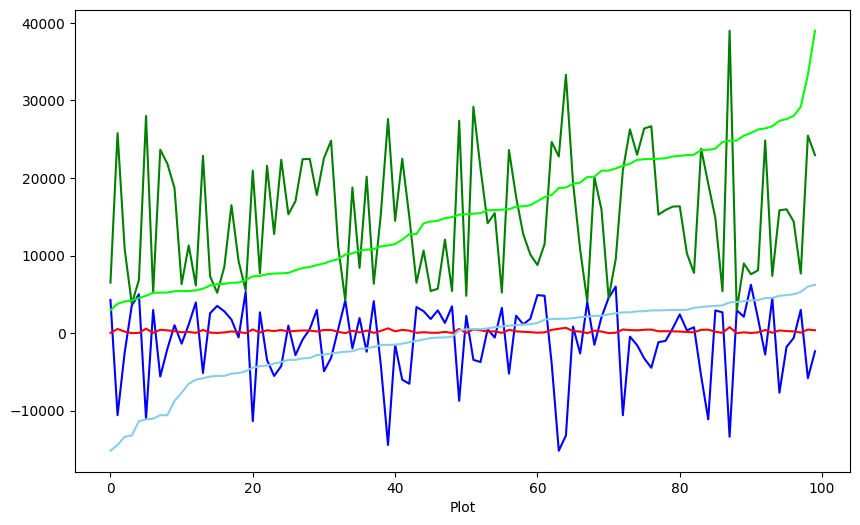

In [19]:
import matplotlib.pyplot as plt
import os
import json

# file = "C:\Users\ashut\Documents\GitHub\SBIT\sim2\main.exe"
jsonFile = "../../sim2/model.json"
# os.startfile(file)

with open(jsonFile, 'r') as file:
    jsonComp = json.load(file)

jsonStuff = jsonComp["Node_investments"]
jsonMoreStuff = jsonComp["Node_Shares"]
jsonMarketPrices = jsonComp["MarketPrices"]
jsonStuffZScore = []
jsonEvenMoreStuff = []
all = []

for i in range(len(jsonStuff)):
    jsonStuffZScore.append(jsonStuff[i])

for i in range(len(jsonMoreStuff)):
    jsonEvenMoreStuff.append(jsonMoreStuff[i])

for i in range(len(jsonMoreStuff)):
    all.append(jsonStuff[i] + jsonMoreStuff[i] * jsonMarketPrices[-1])

jsonEvenMoreStuff = jsonEvenMoreStuff[0:100]
jsonStuffZScore = jsonStuffZScore[0:100]
all = all[0:100]

plt.figure(figsize=(10, 6))
plt.plot(range(len(jsonStuffZScore)), jsonStuffZScore, color='blue')
plt.plot(range(len(jsonEvenMoreStuff)), jsonEvenMoreStuff, color='red')
plt.plot(range(len(all)), all, color="green")
plt.plot(range(len(all)), sorted(all), color="lime")
plt.plot(range(len(jsonStuffZScore)), sorted(jsonStuffZScore), color="skyblue")
plt.xlabel('Plot')
plt.ylabel('')
plt.title('')

Text(0.5, 1.0, '')

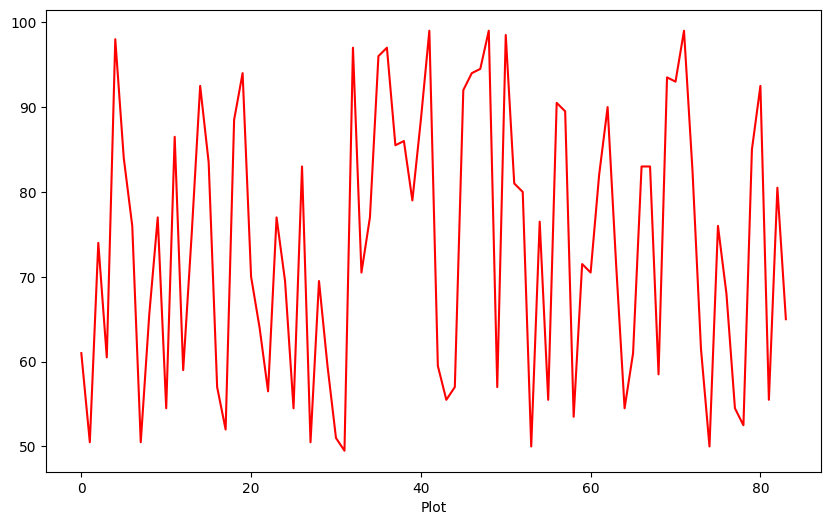

In [20]:
import matplotlib.pyplot as plt
import os
import json

# file = "C:\Users\ashut\Documents\GitHub\SBIT\sim2\main.exe"
jsonFile = "../../sim2/model.json"
# os.startfile(file)

with open(jsonFile, 'r') as file:
    jsonComp = json.load(file)

jsonStuff = jsonComp["MarketPrices"]
jsonStuffZScore = []

for i in range(1, len(jsonStuff)):
    if i % 9999 == 0:
        jsonStuffZScore.append(jsonStuff[i])

plt.figure(figsize=(10, 6))
plt.plot(range(len(jsonStuffZScore)), jsonStuffZScore, color='red')

plt.xlabel('Plot')
plt.ylabel('')
plt.title('')

Text(0.5, 1.0, '')

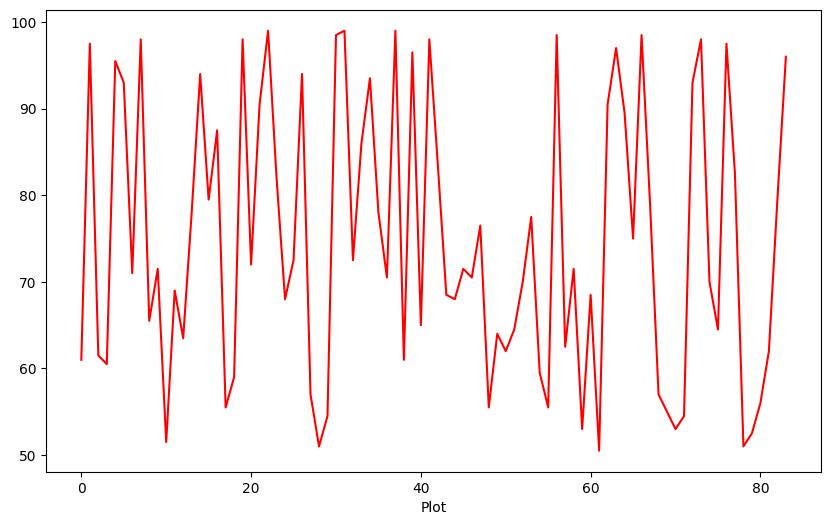

In [21]:
import matplotlib.pyplot as plt
import os
import json

# file = "C:\Users\ashut\Documents\GitHub\SBIT\sim2\main.exe"
jsonFile = "../../sim2/model.json"
# os.startfile(file)

with open(jsonFile, 'r') as file:
    jsonComp = json.load(file)

jsonStuff = jsonComp["MarketPrices"]
jsonStuffZScore = []

for i in range(1, len(jsonStuff)):
    if i % 10000 == 0:
        jsonStuffZScore.append(jsonStuff[i])

plt.figure(figsize=(10, 6))
plt.plot(range(len(jsonStuffZScore)), jsonStuffZScore, color='red')

plt.xlabel('Plot')
plt.ylabel('')
plt.title('')

This is going to be monte carlo sim of the population of nodes and show the distribution of wealth over time in all these instances

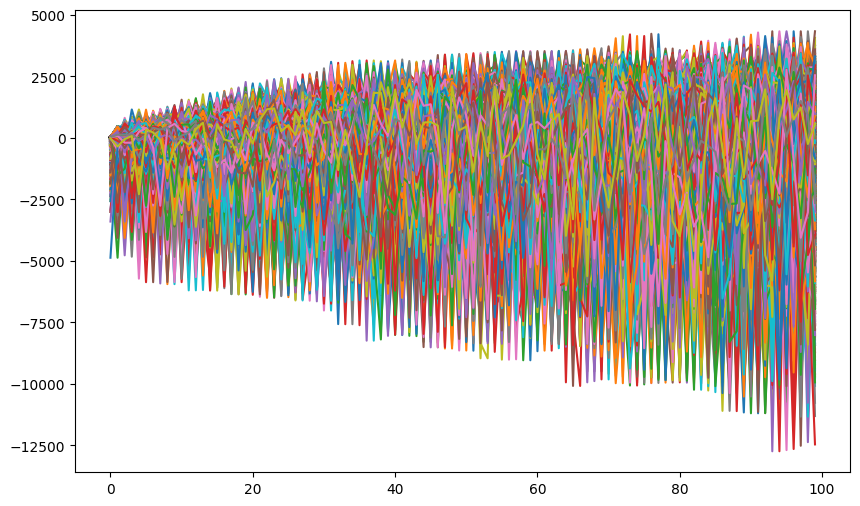

In [47]:
import math
import matplotlib.pyplot as plt

jsonFile = "../../sim2/model.json"

with open(jsonFile, "r") as file:
    jsonFile = json.load(file)

plt.figure(figsize=(10,6))

indexes_1 = [x for x in range(100)]
investments = jsonFile["Agg_Node_Investments"]

for i in range(len(investments)):
    x = []
    for j in range(100):
        x.append(investments[f"{i}"][j])
    plt.plot(indexes_1, x)

plt.show()

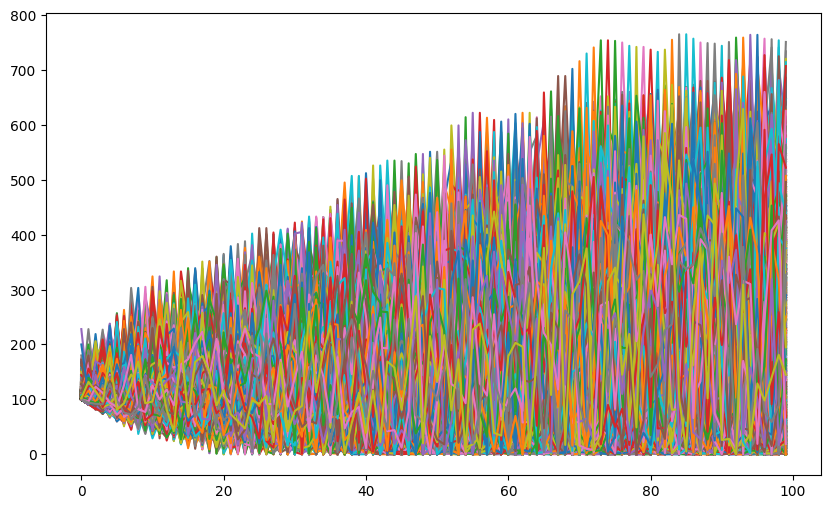

In [48]:
shares = jsonFile["Agg_Node_Shares"]

plt.figure(figsize=(10,6))

for i in range(len(shares)):
    y = []
    for j in range(100):
        y.append(shares[f"{i}"][j])
    plt.plot(indexes_1, y)

plt.show()

This is going to be a graph showing market price (eventually)
- as population increases what happens